In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('events.csv')

In [4]:
print(df.columns)

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')


Simple bar plot

                event_time event_type  product_id          category_id  \
0  2020-09-24 11:57:06 UTC       view     1996170  2144415922528452715   
1  2020-09-24 11:57:26 UTC       view      139905  2144415926932472027   
2  2020-09-24 11:57:27 UTC       view      215454  2144415927158964449   
3  2020-09-24 11:57:33 UTC       view      635807  2144415923107266682   
4  2020-09-24 11:57:36 UTC       view     3658723  2144415921169498184   

                   category_code        brand   price              user_id  \
0          electronics.telephone          NaN   31.90  1515915625519388267   
1    computers.components.cooler       zalman   17.16  1515915625519380411   
2                            NaN          NaN    9.81  1515915625513238515   
3  computers.peripherals.printer       pantum  113.81  1515915625519014356   
4                            NaN  cameronsino   15.87  1515915625510743344   

  user_session  
0   LJuJVLEjPT  
1   tdicluNnRY  
2   4TMArHtXQy  
3   aGFYrNgC08  
4

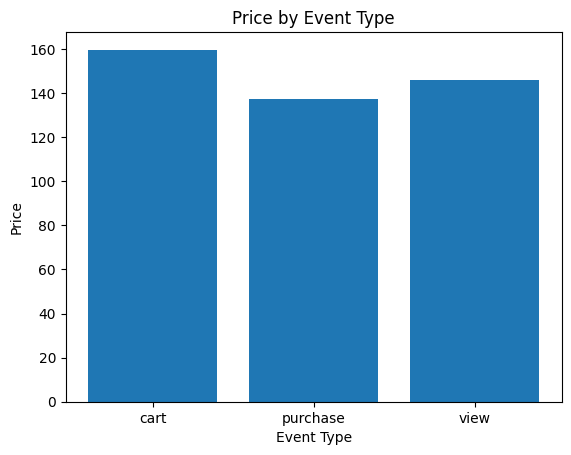

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('events.csv')
df = pd.DataFrame(df)


print(df.head())


aggregated_data = df.groupby('event_type')['price'].mean().reset_index()

plt.bar(aggregated_data['event_type'], aggregated_data['price'])
plt.xlabel('Event Type')
plt.ylabel('Price')
plt.title('Price by Event Type')
plt.show()

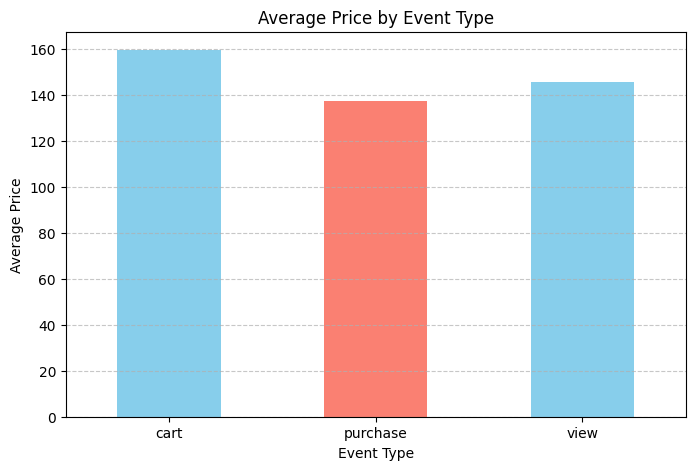

<ipython-input-6-5c306e7fcc65>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='event_type', y='price', palette='Set2')


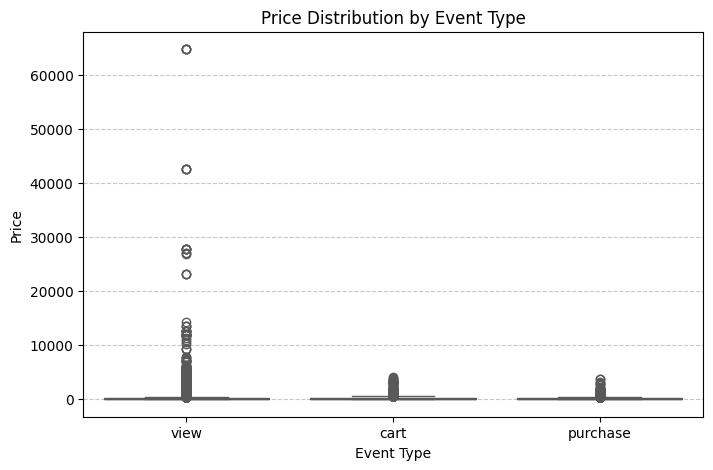

<ipython-input-6-5c306e7fcc65>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='event_type', palette='pastel')


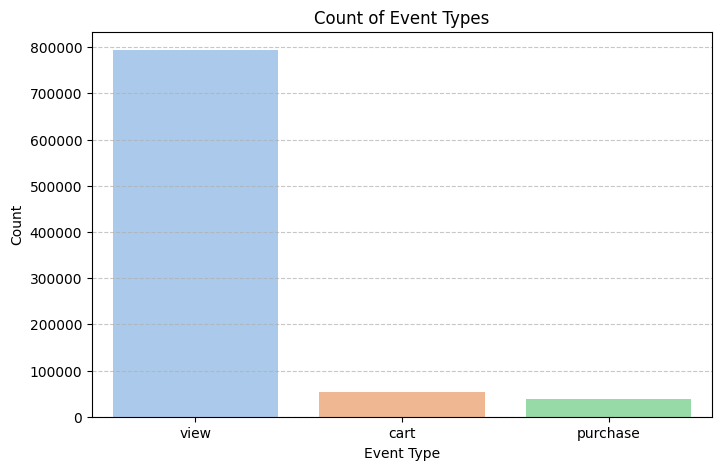

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('events.csv')
df = pd.DataFrame(df)

# Convert event_time to datetime
df['event_time'] = pd.to_datetime(df['event_time'])

# 1. Bar Plot Using Matplotlib
avg_price = df.groupby('event_type')['price'].mean()

plt.figure(figsize=(8, 5))
avg_price.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Price by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Box Plot Using Seaborn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='event_type', y='price', palette='Set2')
plt.title('Price Distribution by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Count Plot Using Seaborn
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='event_type', palette='pastel')
plt.title('Count of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

(885129, 9)


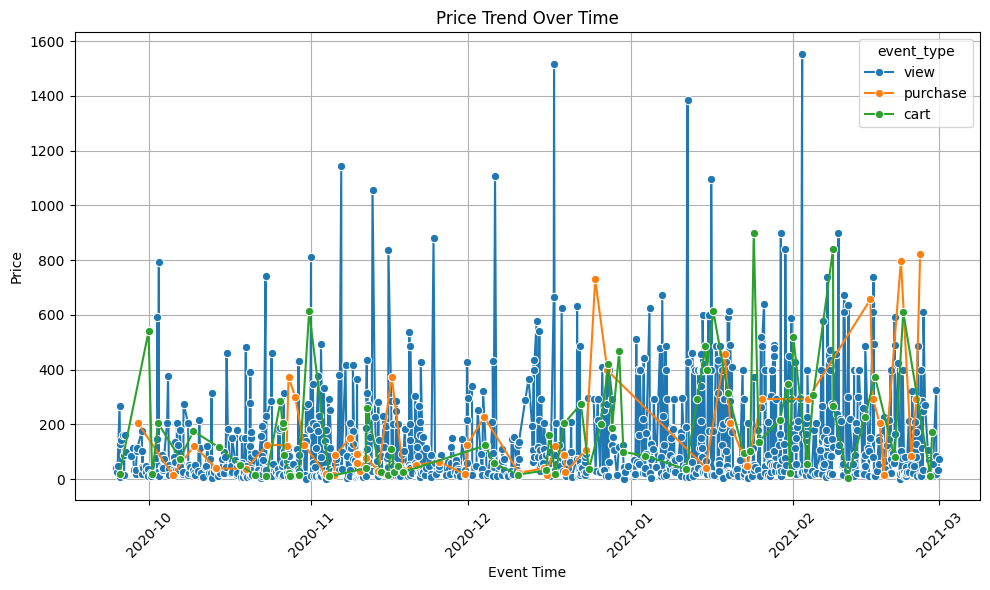

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('events.csv')

df['event_time'] = pd.to_datetime(df['event_time'])


print(df.shape)

if df.shape[0] > 1000:  # Adjust the threshold as needed
    df = df.sample(n=1000, random_state=1)  # Randomly sample 1000 rows


plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='event_time', y='price', hue='event_type', marker='o')
plt.title('Price Trend Over Time')
plt.xlabel('Event Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

A pie chart is a circular statistical graphic that is divided into slices to illustrate numerical proportions

(-1.099999991943285,
 1.099999998831636,
 -1.0999997594410813,
 1.0999997490139573)

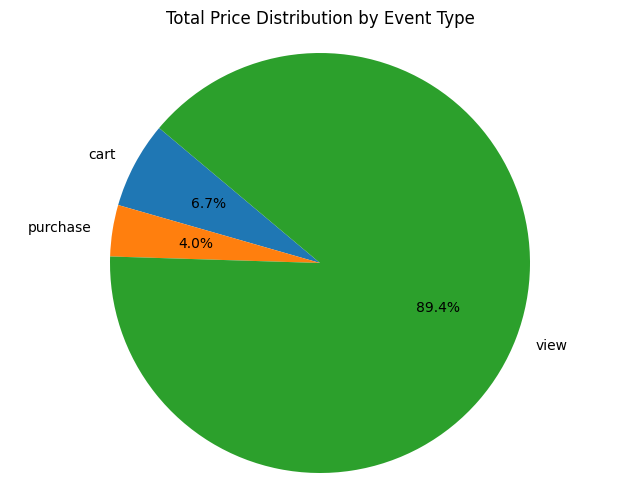

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv('events.csv')
df = pd.DataFrame(df)

price_by_event = df.groupby('event_type')['price'].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(price_by_event, labels=price_by_event.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Price Distribution by Event Type')
plt.axis('equal')

 Scatter plots are useful for observing relationships between variables, identifying trends, and detecting outliers

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('events.csv')

df['price_by_event'] = df.apply(lambda row: row['price'] * 1.5 if row['event_type'] == 'purchase' else row['price'], axis=1)


plt.figure(figsize=(8, 6))


plt.scatter(df['user_id'], df['price_by_event'], alpha=0.5)
plt.title('Price by Event vs User ID')
plt.xlabel('User  ID')
plt.ylabel('Price by Event')
plt.grid()
plt.show()

### If you have a correlation matrix or a pivot table, you can visualize it using a heatmap. This is particularly useful for understanding relationships between multiple variables.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('events.csv')

df['event_time'] = pd.to_datetime(df['event_time'])

df_encoded = pd.get_dummies(df, columns=['event_type', 'category_code', 'brand'], drop_first=True)

print(df_encoded.dtypes)


numeric_df = df_encoded.select_dtypes(include=['number'])


correlation_matrix = numeric_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## A radar chart can be used to compare multiple quantitative variables. This is particularly useful if you want to compare different event types across several metrics.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('events.csv')


categories = list(df.columns[1:])
N = len(categories)


angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()


values = df.loc[0, categories].values.flatten().tolist()
values += values[:1]
angles += angles[:1]


plt.figure(figsize=(8, 8), dpi=100)
ax = plt.subplot(111, polar=True)
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)


ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)


plt.title('Radar Chart for Event Data', size=15, color='blue', weight='bold')


plt.show()

# A violin plot combines a box plot with a kernel density plot, providing a deeper understanding of the distribution of the data.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv('events.csv')
df = pd.DataFrame(df)


plt.figure(figsize=(8, 6))
sns.violinplot(x='event_type', y='price', data=df)
plt.title('Price Distribution by Event Type (Violin Plot)')
plt.xlabel('Event Type')
plt.ylabel('Price')
plt.show()